# CPSC 322: HW3

Name: ***Tony Nguyen***

Term: Fall 2023

## Load HW3 Classes

In [1]:
from data_util import *
from data_table import DataTable, DataRow

## Load & Combine Datasets
### Load `auto-mpg.txt`

In [2]:
auto_mpg = DataTable(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear', 'origin', 'modelname'])
auto_mpg.load('auto-mpg.txt')
auto_mpg

mpg      cylinders    displacement  horsepower      weight    acceleration    modelyear    origin  modelname
-----  -----------  --------------  ------------  --------  --------------  -----------  --------  ------------------------------------
18.0             8           307    130.0             3504            12             70         1  chevrolet chevelle malibu
15.0             8           350    165.0             3693            11.5           70         1  buick skylark 320
18.0             8           318    150.0             3436            11             70         1  plymouth satellite
16.0             8           304    150.0             3433            12             70         1  amc rebel sst
17.0             8           302    140.0             3449            10.5           70         1  ford torino
15.0             8           429    198.0             4341            10             70         1  ford galaxie 500
14.0             8           454    220.0             4

### Load `auto-prices.txt`

In [3]:
auto_price = DataTable(['modelname', 'modelyear', 'msrp'])
auto_price.load('auto-prices.txt')
auto_price

modelname                               modelyear    msrp
------------------------------------  -----------  ------
amc ambassador dpl                             70    3114
amc rebel sst (sw)                             70    2766
buick estate wagon (sw)                        70    4226
buick skylark 320                              70    2847
chevrolet chevelle concours (sw)               70    3210
chevrolet chevelle malibu                      70    2881
chevrolet impala                               70    3132
chevrolet monte carlo                          70    3123
dodge challenger se                            70    3914
ford galaxie 500                               70    3137
ford maverick                                  70    1995
ford mustang boss 302                          70    3126
ford torino                                    70    2778
ford torino (sw)                               70    3164
plymouth duster                                70    2547
plymouth fury 

### Combine both Datasets

In [4]:
combined = DataTable.combine(auto_mpg, auto_price, ['modelname', 'modelyear'], non_matches=True)


## Combined Dataset Exploratory Findings

In [5]:
iterate_list = []
for i in range(15):
    iterate_list.append(i)

In [6]:
combined.rows(iterate_list)

mpg      cylinders    displacement    horsepower    weight    acceleration    modelyear    origin  modelname                           msrp
-----  -----------  --------------  ------------  --------  --------------  -----------  --------  --------------------------------  ------
18.0             8             307           130      3504            12             70         1  chevrolet chevelle malibu           2881
15.0             8             350           165      3693            11.5           70         1  buick skylark 320                   2847
18.0             8             318           150      3436            11             70         1  plymouth satellite                  2831
17.0             8             302           140      3449            10.5           70         1  ford torino                         2778
15.0             8             429           198      4341            10             70         1  ford galaxie 500                    3137
14.0             8  

### Number of Rows

In [7]:
combined.row_count()

331

### Duplicate Instances

In [8]:
duplicate_instances(combined)

  mpg    cylinders    displacement    horsepower    weight    acceleration    modelyear    origin  modelname       msrp
-----  -----------  --------------  ------------  --------  --------------  -----------  --------  ------------  ------
 19              6             232           100      2634            13             71         1  amc gremlin     1999
 18              6             250            88      3139            14.5           71         1  ford mustang    3322
 19              4             122            85      2310            18.5           73         1  ford pinto      2021
 21.5            3              80           110      2720            13.5           77         3  mazda rx-4      5470

### Remove the Duplicated Instances

In [9]:
combined = remove_duplicates(combined)
combined.rows(iterate_list)

mpg      cylinders    displacement    horsepower    weight    acceleration    modelyear    origin  modelname                           msrp
-----  -----------  --------------  ------------  --------  --------------  -----------  --------  --------------------------------  ------
18.0             8             307           130      3504            12             70         1  chevrolet chevelle malibu           2881
15.0             8             350           165      3693            11.5           70         1  buick skylark 320                   2847
18.0             8             318           150      3436            11             70         1  plymouth satellite                  2831
17.0             8             302           140      3449            10.5           70         1  ford torino                         2778
15.0             8             429           198      4341            10             70         1  ford galaxie 500                    3137
14.0             8  

### Number of Rows after Removed

In [10]:
combined.row_count()

327

### Unique Values
#### `cylinders` attribute

In [11]:
distinct_values(combined, 'cylinders')

[8, 4, 6, 3, 5, '']

#### `origin` attribute

In [12]:
distinct_values(combined, 'origin')

[1, 3, 2, '']

#### `modelyear` attribute

In [13]:
distinct_values(combined, 'modelyear')

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

### Missing `MSRP` Values

In [14]:
show_missing(combined, ['msrp'])

mpg      cylinders    displacement    horsepower    weight    acceleration    modelyear    origin  modelname                          msrp
-----  -----------  --------------  ------------  --------  --------------  -----------  --------  ---------------------------------  ------
16.0             8             304           150      3433            12             70         1  amc rebel sst
                 4             133           115      3090            17.5           70         2  citroen ds-21 pallas
14.0             8             340           160      3609             8             70         1  plymouth 'cuda 340
15.0             8             400           150      3761             9.5           70         1  chevrolet monte carlo s
18.0             6             199            97      2774            15.5           70         1  amc hornet
27.0             4              97            88      2130            14.5           70         3  datsun pl510
26.0             4      

## Combined Dataset Modification
### Remove Irrelevant Attributes

In [15]:
combined.drop(['displacement', 'weight', 'horsepower', 'acceleration'])

In [16]:
combined.rows(iterate_list)

mpg      cylinders    modelyear    origin  modelname                           msrp
-----  -----------  -----------  --------  --------------------------------  ------
18.0             8           70         1  chevrolet chevelle malibu           2881
15.0             8           70         1  buick skylark 320                   2847
18.0             8           70         1  plymouth satellite                  2831
17.0             8           70         1  ford torino                         2778
15.0             8           70         1  ford galaxie 500                    3137
14.0             8           70         1  chevrolet impala                    3132
14.0             8           70         1  plymouth fury iii                   3174
14.0             8           70         1  pontiac catalina                    3164
15.0             8           70         1  amc ambassador dpl                  3114
                 8           70         1  chevrolet chevelle concours (sw) 

### Replace Missing `MSRP` Values

In [17]:
combined = replace_missing(combined, 'msrp', ['modelyear', 'cylinders'], mean)
combined.rows(iterate_list)

mpg      cylinders    modelyear    origin  modelname                           msrp
-----  -----------  -----------  --------  --------------------------------  ------
18.0             8           70         1  chevrolet chevelle malibu           2881
15.0             8           70         1  buick skylark 320                   2847
18.0             8           70         1  plymouth satellite                  2831
17.0             8           70         1  ford torino                         2778
15.0             8           70         1  ford galaxie 500                    3137
14.0             8           70         1  chevrolet impala                    3132
14.0             8           70         1  plymouth fury iii                   3174
14.0             8           70         1  pontiac catalina                    3164
15.0             8           70         1  amc ambassador dpl                  3114
                 8           70         1  chevrolet chevelle concours (sw) 

### Replace Missing `MPG` Value

In [18]:
combined = replace_missing(combined, 'mpg', ['modelyear', 'cylinders'], mean)
combined.rows(iterate_list)

    mpg    cylinders    modelyear    origin  modelname                           msrp
-------  -----------  -----------  --------  --------------------------------  ------
18                 8           70         1  chevrolet chevelle malibu           2881
15                 8           70         1  buick skylark 320                   2847
18                 8           70         1  plymouth satellite                  2831
17                 8           70         1  ford torino                         2778
15                 8           70         1  ford galaxie 500                    3137
14                 8           70         1  chevrolet impala                    3132
14                 8           70         1  plymouth fury iii                   3174
14                 8           70         1  pontiac catalina                    3164
15                 8           70         1  amc ambassador dpl                  3114
14.1111            8           70         1  chevrolet

### Remove Other Missing Data

In [19]:
combined = remove_missing(combined, combined.columns())

In [20]:
combined

    mpg    cylinders    modelyear    origin  modelname                               msrp
-------  -----------  -----------  --------  ------------------------------------  ------
18                 8           70         1  chevrolet chevelle malibu               2881
15                 8           70         1  buick skylark 320                       2847
18                 8           70         1  plymouth satellite                      2831
17                 8           70         1  ford torino                             2778
15                 8           70         1  ford galaxie 500                        3137
14                 8           70         1  chevrolet impala                        3132
14                 8           70         1  plymouth fury iii                       3174
14                 8           70         1  pontiac catalina                        3164
15                 8           70         1  amc ambassador dpl                      3114
14.1111   

### Final row count

In [21]:
combined.row_count()

316

## Export Table

In [22]:
combined.save('auto-clean.txt')

## Plot Charts
### Dot Charts

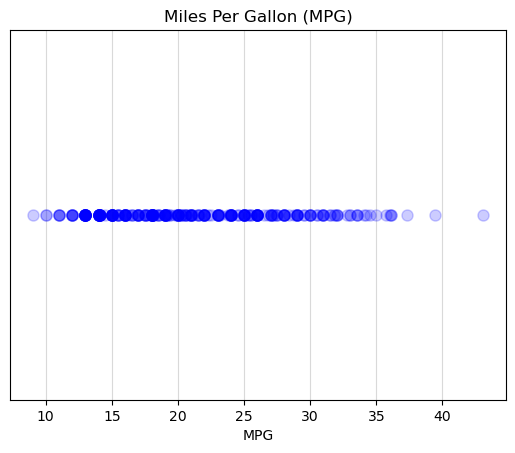

In [23]:
title = "Miles Per Gallon (MPG)"

dot_chart(combined.get_column_data('mpg'), 'MPG', title)

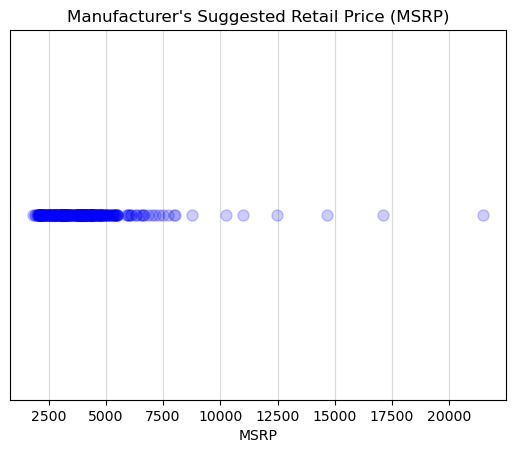

In [24]:
title = "Manufacturer's Suggested Retail Price (MSRP)"

dot_chart(combined.get_column_data('msrp'), 'MSRP', title)

### Pie & Bar Charts

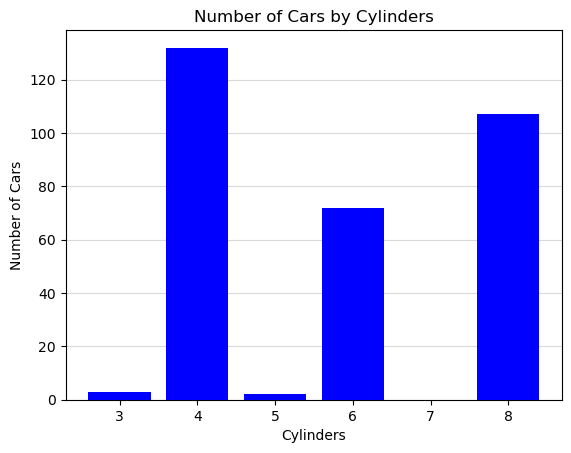

In [25]:
title = "Number of Cars by Cylinders"
x_val, y_val = summary_stat_by_column(combined, 'cylinders', 'cylinders', count)

bar_chart(y_val, x_val, 'Cylinders', 'Number of Cars', title)

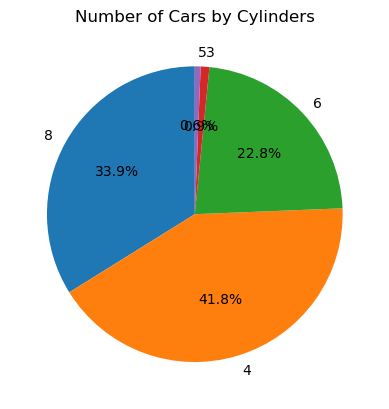

In [26]:
title = "Number of Cars by Cylinders"
x_val, y_val = summary_stat_by_column(combined, 'cylinders', 'cylinders', count)

pie_chart(y_val, x_val, title)

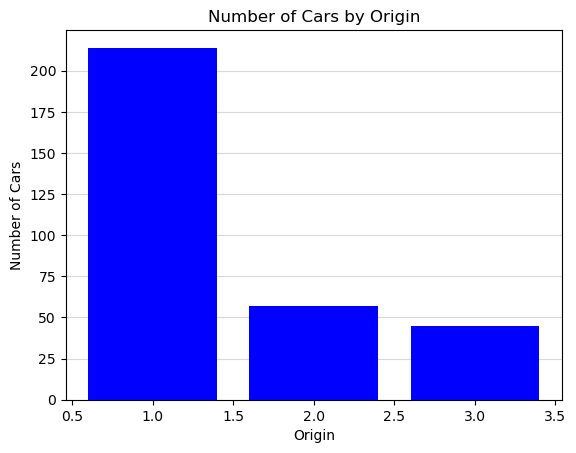

In [27]:
title = "Number of Cars by Origin"
x_val, y_val = summary_stat_by_column(combined, 'origin', 'origin', count)

bar_chart(y_val, x_val, 'Origin', 'Number of Cars', title)

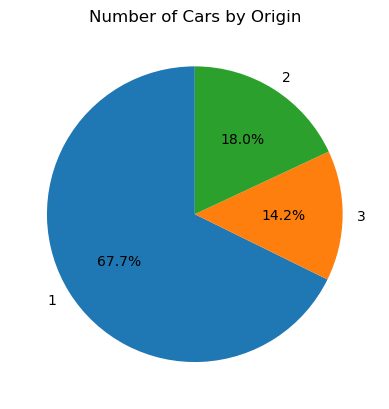

In [28]:
title = "Number of Cars by Origin"
x_val, y_val = summary_stat_by_column(combined, 'origin', 'origin', count)

pie_chart(y_val, x_val, title)

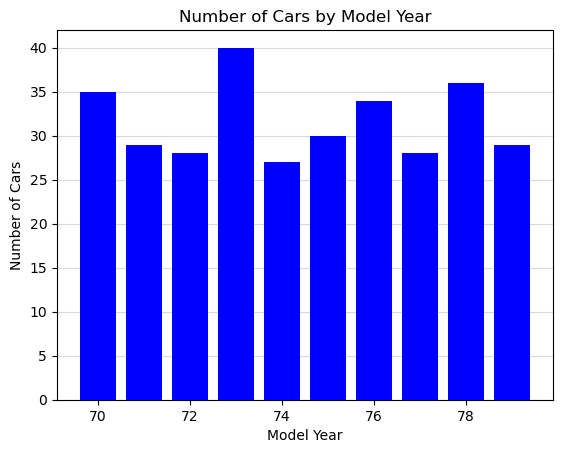

In [29]:
title = "Number of Cars by Model Year"
x_val, y_val = summary_stat_by_column(combined, 'modelyear', 'modelyear', count)

bar_chart(y_val, x_val, 'Model Year', 'Number of Cars', title)

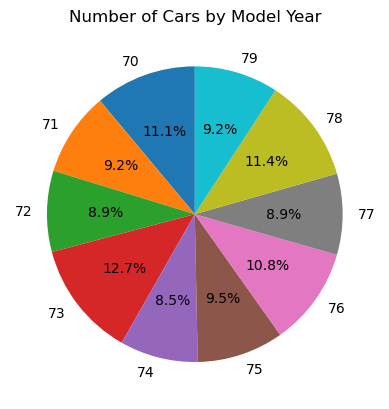

In [30]:
title = "Number of Cars by Model Year"
x_val, y_val = summary_stat_by_column(combined, 'modelyear', 'modelyear', count)

pie_chart(y_val, x_val, title)

### Box & Whisker Charts

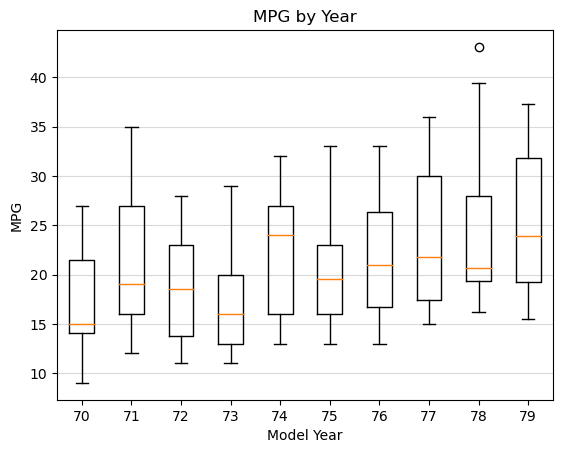

In [31]:
title = "MPG by Year"
split = partition(combined, ['modelyear'])

distribution = [split[i].get_column_data('mpg') for i in range(len(split))]
labels = distinct_values(combined, 'modelyear')

box_plot(distribution, labels, 'Model Year', 'MPG', title)

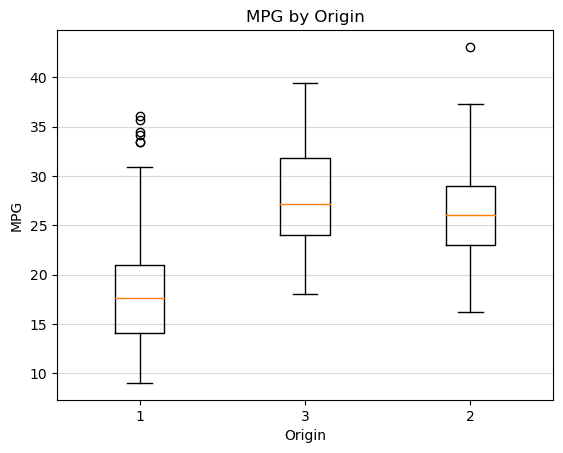

In [32]:
title = "MPG by Origin"
split = partition(combined, ['origin'])

distribution = [split[i].get_column_data('mpg') for i in range(len(split))]
labels = distinct_values(combined, 'origin')

box_plot(distribution, labels, 'Origin', 'MPG', title)

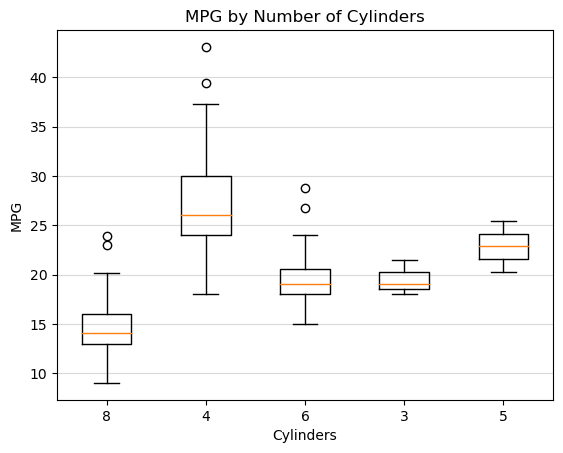

In [33]:
title = "MPG by Number of Cylinders"
split = partition(combined, ['cylinders'])

distribution = [split[i].get_column_data('mpg') for i in range(len(split))]
labels = distinct_values(combined, 'cylinders')

box_plot(distribution, labels, 'Cylinders', 'MPG', title)

### Scatter Plot

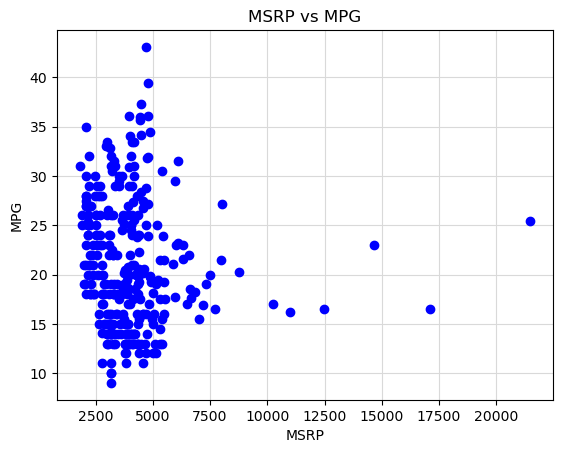

In [34]:
title = "MSRP vs MPG"
x_val = []
y_val = []

for row in combined:
    x_val.append(row['msrp'])
    y_val.append(row['mpg'])

scatter_plot(x_val, y_val, 'MSRP', 'MPG', title)

## Comments on Visualization

For this dataset, after seeing the scatter plot and the box plots, there is a set of pattern that can be used to predict a vehicle fuel economy, i.e., has a higher MPG:
* Lower MSRP cars have higher MPG
* Cars manufactured in 4 cylinders configuration
* Cars manufactured in Country of Origin 3
* Newer cars.
